Classification II

# Naive Bayes

Naive Bayes adalah teknik klasifikasi statistik berdasarkan Bayes Theorem. Naive Bayes classifier adalah algoritme yang cepat, akurat, dan andal. Naive Bayes classifier memiliki akurasi dan kecepatan tinggi pada kumpulan data besar.

In [1]:
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny', 'Rainy','Sunny','Overcast','Overcast','Rainy']

temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

**Encoding Features**

In [2]:
# Import LabelEncoder
from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
weather_encoded=le.fit_transform(weather)

print("Weather", weather_encoded)

Weather [2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [3]:
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)

print("Temp:",temp_encoded)
print("Play:",label)

Temp: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [4]:
#Combinig weather and temp into single listof tuples

features=list(zip(weather_encoded,temp_encoded))

features

[(2, 1),
 (2, 1),
 (0, 1),
 (1, 2),
 (1, 0),
 (1, 0),
 (0, 0),
 (2, 2),
 (2, 0),
 (1, 2),
 (2, 2),
 (0, 2),
 (0, 1),
 (1, 2)]

## Naive Bayes with Single Labels

In [5]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
naiveBayes = GaussianNB()

# Train the model using the training sets
naiveBayes.fit(features,label)

#Predict Output
# 1 Rain , 0 : cold 
predicted= naiveBayes.predict([[0,2]]) # 0:Overcast, 2:Mild
print("Predicted Value:", predicted)

Predicted Value: [1]


## Naive Bayes with Multiple Labels

In [6]:
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()

In [7]:
# print the names of the 13 features
print("Features: ", wine.feature_names)

# print the label type of wine(class_0, class_1, class_2)
print("Labels: ", wine.target_names)

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels:  ['class_0' 'class_1' 'class_2']


In [8]:
# print data(feature)shape
wine.data.shape

(178, 13)

In [9]:
# print the wine data features (top 5 records)
print(wine.data[0:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [10]:
# print the wine labels (0:Class_0, 1:class_1, 2:class_2)
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [11]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3,random_state=109) # 70% training and 30% test

In [12]:
X_train

array([[1.323e+01, 3.300e+00, 2.280e+00, ..., 5.600e-01, 1.510e+00,
        6.750e+02],
       [1.384e+01, 4.120e+00, 2.380e+00, ..., 5.700e-01, 1.640e+00,
        4.800e+02],
       [1.220e+01, 3.030e+00, 2.320e+00, ..., 6.600e-01, 1.830e+00,
        5.100e+02],
       ...,
       [1.362e+01, 4.950e+00, 2.350e+00, ..., 9.100e-01, 2.050e+00,
        5.500e+02],
       [1.336e+01, 2.560e+00, 2.350e+00, ..., 7.000e-01, 2.470e+00,
        7.800e+02],
       [1.439e+01, 1.870e+00, 2.450e+00, ..., 1.020e+00, 3.580e+00,
        1.290e+03]])

In [13]:
from sklearn.naive_bayes import GaussianNB

naiveBayes2 = GaussianNB()
naiveBayes2.fit(X_train, y_train)

y_pred = naiveBayes2.predict(X_test)

In [14]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9074074074074074


# Decision Tree

Decision tree adalah flowchart-like tree structure di mana internal node mewakili feature(atau attribute), branch mewakili decision rule, dan setiap leaf node mewakili outcome.

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics 

***Contoh 1***

In [16]:
url = "https://raw.githubusercontent.com/iketutg/my_example_ds/main/data/play_tenis.csv"
df_play_tenis = pd.read_csv(url) 
df_play_tenis

,Day,Outlook,Humidity,Wind,Play
0,D1,Sunny,High,Weak,No
1,D2,Sunny,High,Strong,No
2,D3,Overcast,High,Weak,Yes
3,D4,Rain,High,Weak,Yes
4,D5,Rain,Normal,Weak,Yes
5,D6,Rain,Normal,Strong,No
6,D7,Overcast,Normal,Strong,Yes
7,D8,Sunny,High,Weak,No
8,D9,Sunny,Normal,Weak,Yes
9,D10,Rain,Normal,Weak,Yes


In [17]:
df_play_tenis.drop(columns=['Day'], axis=1, inplace=True)

In [18]:
df_play_tenis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Outlook   14 non-null     object
 1   Humidity  14 non-null     object
 2   Wind      14 non-null     object
 3   Play      14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


In [19]:
from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder() 
cols = list(df_play_tenis)

for col in cols: 
    df_play_tenis[col] = le.fit_transform(df_play_tenis[col])
df_play_tenis 

,Outlook,Humidity,Wind,Play
0,2,0,1,0
1,2,0,0,0
2,0,0,1,1
3,1,0,1,1
4,1,1,1,1
5,1,1,0,0
6,0,1,0,1
7,2,0,1,0
8,2,1,1,1
9,1,1,1,1


In [20]:
# Select Feature 
feature = df_play_tenis.drop('Play', axis=1)
feature_cols = list(feature)
feature 

# Select target
target = df_play_tenis['Play']
target

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: Play, dtype: int32

In [21]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=1) # 80% training and 20% test
X_train

,Outlook,Humidity,Wind
2,0,0,1
10,2,1,0
4,1,1,1
1,2,0,0
12,0,1,1
0,2,0,1
13,1,0,0
9,1,1,1
8,2,1,1
11,0,0,0


In [22]:
X_test

,Outlook,Humidity,Wind
3,1,0,1
7,2,0,1
6,0,1,0


In [23]:
decTree1 = DecisionTreeClassifier()
decTree1 = decTree1.fit(X_train,y_train)

y_pred = decTree1.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


***Contoh 2***

In [24]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

pima = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/diabetes.csv", header=None, names=col_names)

In [25]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [26]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pregnant  769 non-null    object
 1   glucose   769 non-null    object
 2   bp        769 non-null    object
 3   skin      769 non-null    object
 4   insulin   769 non-null    object
 5   bmi       769 non-null    object
 6   pedigree  769 non-null    object
 7   age       769 non-null    object
 8   label     769 non-null    object
dtypes: object(9)
memory usage: 54.2+ KB


In [27]:
numer = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree', 'label']

for col in numer: # coerce for missing values
    pima[col] = pd.to_numeric(pima[col], errors='coerce')

In [28]:
pima.dropna(inplace=True)

In [29]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']

X = pima[feature_cols] # Features
y = pima.label # Target variable
print(X)
print(y)

     pregnant  insulin   bmi   age  glucose    bp  pedigree
1         6.0      0.0  33.6  50.0    148.0  72.0     0.627
2         1.0      0.0  26.6  31.0     85.0  66.0     0.351
3         8.0      0.0  23.3  32.0    183.0  64.0     0.672
4         1.0     94.0  28.1  21.0     89.0  66.0     0.167
5         0.0    168.0  43.1  33.0    137.0  40.0     2.288
..        ...      ...   ...   ...      ...   ...       ...
764      10.0    180.0  32.9  63.0    101.0  76.0     0.171
765       2.0      0.0  36.8  27.0    122.0  70.0     0.340
766       5.0    112.0  26.2  30.0    121.0  72.0     0.245
767       1.0      0.0  30.1  47.0    126.0  60.0     0.349
768       1.0      0.0  30.4  23.0     93.0  70.0     0.315

[768 rows x 7 columns]
1      1.0
2      0.0
3      1.0
4      0.0
5      1.0
      ... 
764    0.0
765    0.0
766    0.0
767    1.0
768    0.0
Name: label, Length: 768, dtype: float64


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [31]:
decTree2 = DecisionTreeClassifier()
decTree2 = decTree2.fit(X_train,y_train)

y_pred = decTree2.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7077922077922078


## Visualizing Decision Tree

In [32]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [33]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [34]:
!pip install six

In [35]:
import sklearn.tree as tree
import pydotplus
from six import StringIO
from IPython.display import Image

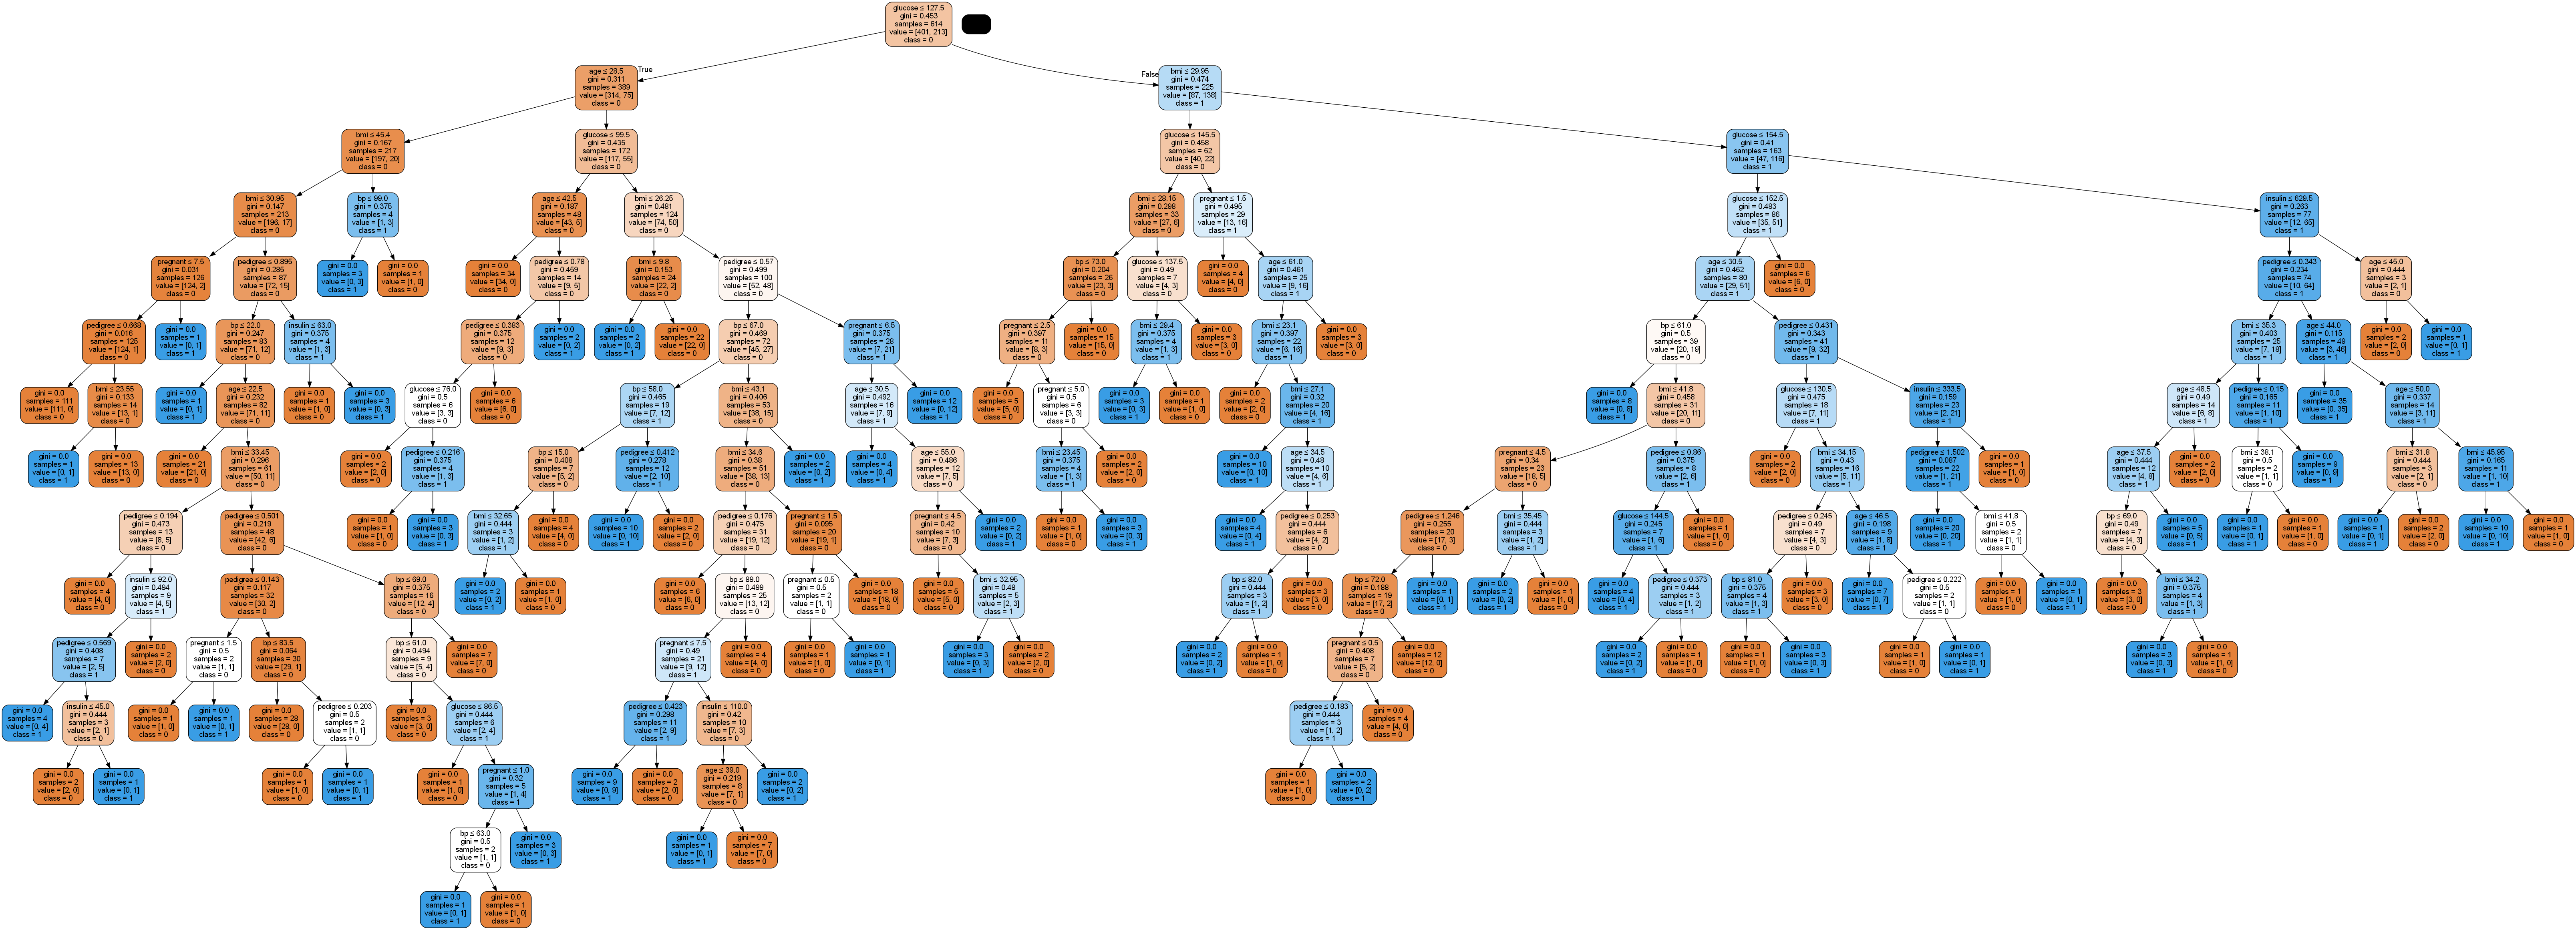

In [36]:
dot_data = StringIO()

tree.export_graphviz(decTree2, out_file=dot_data,
                     class_names=['0','1'], # nama target
                     feature_names=feature_cols,
                     filled=True,
                     rounded=True,
                     special_characters=True)
graph  = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

# Random Forest

Random Forest secara teknis adalah ensemble method (berdasarkan pendekatan divide-and-conquer) dari decision trees yang dihasilkan pada dataset yang dipisahkan secara acak. Kumpulan decision tree classifiers ini juga dikenal sebagai forest.

In [37]:
from sklearn import datasets 

In [38]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [39]:
print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [40]:
print(iris.data[0:5]) 
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [41]:
import pandas as pd

In [42]:
data=pd.DataFrame({    
    'sepal length':iris.data[:,0],    
    'sepal width':iris.data[:,1],    
    'petal length':iris.data[:,2],    
    'petal width':iris.data[:,3],    
    'species':iris.target 
}) 

data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X=data[['sepal length', 'sepal width', 'petal length', 'petal width']] 
y=data['species']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [47]:
ranForest=RandomForestClassifier(n_estimators=100)
ranForest.fit(X_train,y_train)

y_pred=ranForest.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


In [48]:
ranForest.predict([[3, 5, 4, 2]])

C:\Users\sapphire\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

**Feature Importance**

In [49]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics

In [50]:
f_i = ranForest.feature_importances_

In [51]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [52]:
feature_imp = pd.Series(f_i,index=iris.feature_names)

In [53]:
feature_imp = feature_imp.sort_values(ascending=False)
feature_imp

petal length (cm)    0.510149
petal width (cm)     0.370323
sepal length (cm)    0.096041
sepal width (cm)     0.023487
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


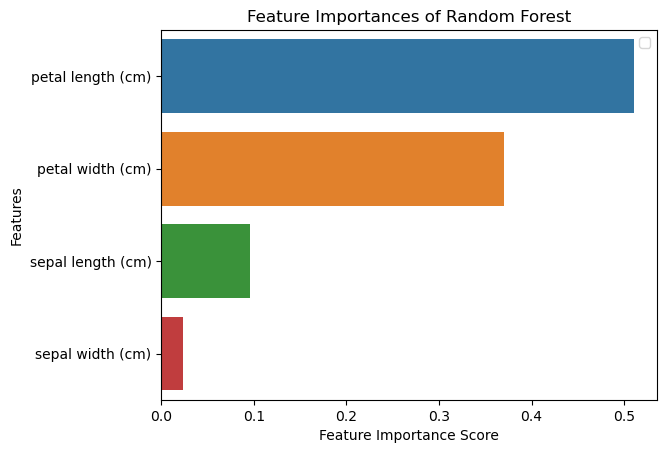

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x = feature_imp, y=feature_imp.index)

plt.title('Feature Importances of Random Forest')
plt.ylabel('Features')
plt.xlabel('Feature Importance Score')
plt.legend()
plt.show()

In [55]:
df_iris = pd.DataFrame(iris.data,columns = iris.feature_names)
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [56]:
df_iris['species'] = iris.target
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [57]:
X = df_iris.drop(['sepal width (cm)','species'],axis=1)
y = df_iris['species']

X_train,X_test,y_train,y_test =   train_test_split(X,y,test_size=0.3,random_state=1)

In [58]:
ranForest2 = RandomForestClassifier(n_estimators=2)
ranForest2.fit(X_train,y_train)

y_pred_train_2 = ranForest2.predict(X_train)
y_pred_test_2 = ranForest2.predict(X_test)

print("Accuracy train 2:",metrics.accuracy_score(y_train, y_pred_train_2))
print("Accuracy test 2:",metrics.accuracy_score(y_test, y_pred_test_2))

Accuracy train 2: 0.9809523809523809
Accuracy test 2: 0.9555555555555556


# Support Vector Machines

Secara umum, Support Vector Machines dianggap sebagai classification approach, tetapi dapat digunakan di kedua jenis masalah klasifikasi dan regresi.

In [59]:
from sklearn import datasets 

In [60]:
cancer = datasets.load_breast_cancer()

In [61]:
print("Features: ", cancer.feature_names) 
print("Labels: ", cancer.target_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


In [62]:
cancer.data.shape

(569, 30)

In [63]:
print(cancer.data[0:5])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

In [64]:
print(cancer.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [65]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=1)

In [66]:
from sklearn import svm 
from sklearn import metrics 

sv_machine = svm.SVC(kernel='linear')
sv_machine.fit(X_train, y_train) 

y_pred = sv_machine.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.956140350877193


In [67]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred)) 

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred))

Precision: 0.935064935064935
Recall: 1.0
